In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd
import numpy as np

## 데이터 로드

In [14]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
iris_data = iris.data
iris_target = iris.target
iris_data.shape

(150, 4)

In [29]:
iris_df = pd.DataFrame(iris_data,columns = iris.feature_names)

In [30]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
iris_df['target'] = iris.target

In [33]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 훈련세트 나누기

In [67]:
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size = 0.2)

## 모델 설계

In [68]:
dt_clf = DecisionTreeClassifier()

In [69]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
pred = dt_clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print('예측 정확도 :{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 :0.9333


## k겹 교차검증

In [73]:
from sklearn.model_selection import KFold

In [75]:
kfold = KFold(n_splits = 5)

In [125]:
iris_accuracy = []
for i,j in kfold.split(iris_data):
    X_train = iris_data[i]
    y_train = iris_target[i]
    #검증세트
    x_val = iris_data[j]
    y_val = iris_target[j]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(x_val)
    accuracy = accuracy_score(y_val,pred)
    
    iris_accuracy.append(accuracy)
    
print(iris_accuracy)
np.mean(iris_accuracy)


[1.0, 1.0, 0.9, 0.9333333333333333, 0.8]


0.9266666666666665

## K겹 계층적 교차검증

In [128]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [129]:
from sklearn.model_selection import StratifiedKFold

In [131]:
skf = StratifiedKFold(n_splits = 3)

In [148]:
n_iters = 0
for train_index,val_index in skf.split(iris_data,iris_target):
    train_target = iris_df['target'].iloc[train_index]
    val_target = iris_df['target'].iloc[val_index]
    n_iters+=1
    
    print(f"##교차 검증 : {n_iters}")
    print(f'학습 레이블 데이터 분포:\n', train_target.value_counts())
    print(f'검증 레이블 데이터 분포:\n', val_target.value_counts())
    print()

##교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: target, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: target, dtype: int64

##교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: target, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: target, dtype: int64

##교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: target, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: target, dtype: int64



## 모델설정 및 훈련

In [152]:
dt_clf  = DecisionTreeClassifier()

In [153]:
skf = StratifiedKFold(n_splits = 5)

In [160]:
accuracy_list = []

for train_idx,val_idx in skf.split(iris_data,iris_target):
    x_train = iris_data[train_idx]
    y_train = iris_target[train_idx]
    x_val =  iris_data[val_idx]
    y_val = iris_target[val_idx]
    
    dt_clf.fit(x_train,y_train)
    pred = dt_clf.predict(x_val)
    accuracy = accuracy_score(y_val,pred)
    accuracy_list.append(accuracy)
print(accuracy_list)

print('평균 정확도 :',np.mean(accuracy_list))

[0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 1.0]
평균 정확도 : 0.9666666666666668


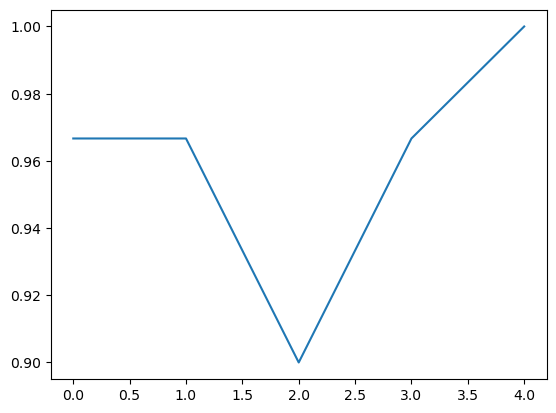

In [157]:
import matplotlib.pyplot as plt
plt.plot(accuracy_list)

In [161]:
from sklearn.model_selection import cross_val_score

In [163]:
dt_clf = DecisionTreeClassifier()

In [165]:
score = cross_val_score(dt_clf, iris_data, iris_target, scoring = 'accuracy',cv=5)

In [169]:
print('교차 검증별 정확도 :',score)
print('평균 검증 정확도 :',np.mean(score))

교차 검증별 정확도 : [0.96666667 0.96666667 0.9        0.93333333 1.        ]
평균 검증 정확도 : 0.9533333333333334


## GridSearch 사용 - 하이퍼라미터 조정api

In [194]:
x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size=0.2)

In [176]:
parameters = {'max_depth' : [1, 2, 3],  
                   'min_samples_split' : [2,3]
                  }

In [174]:
dt = DecisionTreeClassifier()

In [175]:
from sklearn.model_selection import GridSearchCV

In [205]:
grid_dt = GridSearchCV(dt,param_grid = parameters, cv=3, refit = True)

In [206]:
grid_dtree = grid_dt.fit(x_train,y_train)

In [208]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002377,0.002320,0.001471,0.002080,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.675,0.675,0.675,0.675000,1.110223e-16,5
1,0.002103,0.001546,0.000374,0.000529,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.675,0.675,0.675,0.675000,1.110223e-16,5
2,0.000000,0.000000,0.001369,0.001936,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.950,0.925,0.950,0.941667,1.178511e-02,3
3,0.000000,0.000000,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.950,0.925,0.950,0.941667,1.178511e-02,3
4,0.000176,0.000249,0.000538,0.000761,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,0.950,0.975,0.966667,1.178511e-02,1
5,0.001670,0.002362,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,0.950,0.975,0.966667,1.178511e-02,1


In [211]:
print('최적의 파라미터 :',grid_dtree.best_params_)
print('최고 정확도 :',grid_dtree.best_score_)

최적의 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
최고 정확도 : 0.9666666666666667


## 테스트 

In [214]:
estimator = grid_dtree.best_estimator_

In [215]:
pred = estimator.predict(x_test)

In [223]:
print(f'테스트 데이터 정확도 : {accuracy_score(y_test,pred)}')

테스트 데이터 정확도 : 0.9666666666666667
